# Billionaires Dataset Analysis

This project focuses on a dataset that contains personal and business-related information on billionaires around the world. The dataset also contains information on the economic-activity of the billionaire's country of residence. The purpose of this project gain an insight into billionaires' wealth and industry as well as identify any possible trends/patterns among billionaires. 

The dataset was cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes. The dataset is provided by a user from Kaggle (https://www.kaggle.com/datasets/javiersab/billionaires-dataset-cleaned). We will be using Python to analyze the dataset and a series of visualisations such as pandas, seaborn, matplotlib and SciPy libraries to answer the following questions:

1. How is wealth distributed across countries and continents?
2. Do economic indicators have an impact on the presence of billionaires?
3. Which industry contains the most billionaires?
4. Do male or female billionaires earn more?

## Import Libraries

In [135]:
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot as plt 
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

billionaires = pd.read_csv('df_ready.csv')

## Load and Inspect Data

In [136]:
billionaires.head()

,position,wealth,industry,full_name,age,country_of_residence,city_of_residence,source,citizenship,gender,...,gdp_country,g_tertiary_ed_enroll,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long,continent
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,France,M,...,2715518274227,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,Europe
1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America


This dataset contains 30 columns, however we will remove some columns to narrow down our focus to only 15 columns. 

In [137]:
billions = billionaires.drop(columns = ['g_tertiary_ed_enroll', 'g_primary_ed_enroll', 'cpi_change_country', 
                                        'country_pop','last_name', 'country_lat', 'country_long', 'first_name', 'birth_year', 'birth_month', 'birth_day', 'residence_region', 'residence_state', 'birth_date', 'tax_revenue'], axis = 1)
billions.info()
billions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   position              2591 non-null   int64  
 1   wealth                2591 non-null   int64  
 2   industry              2591 non-null   object 
 3   full_name             2591 non-null   object 
 4   age                   2591 non-null   int64  
 5   country_of_residence  2591 non-null   object 
 6   city_of_residence     2591 non-null   object 
 7   source                2591 non-null   object 
 8   citizenship           2591 non-null   object 
 9   gender                2591 non-null   object 
 10  cpi_country           2591 non-null   object 
 11  gdp_country           2591 non-null   int64  
 12  life_expectancy       2591 non-null   float64
 13  tax_rate              2591 non-null   float64
 14  continent             2591 non-null   object 
dtypes: float64(2), int64(

,position,wealth,industry,full_name,age,country_of_residence,city_of_residence,source,citizenship,gender,cpi_country,gdp_country,life_expectancy,tax_rate,continent
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,France,M,110.05,2715518274227,82.5,60.7,Europe
1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",United States,M,117.24,21427700000000,78.5,36.6,North America
2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,United States,M,117.24,21427700000000,78.5,36.6,North America
3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,United States,M,117.24,21427700000000,78.5,36.6,North America
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,United States,M,117.24,21427700000000,78.5,36.6,North America


The dataset contains 2591 rows and 15 columns containing info about the industry in which the billionaires' operate, their source of wealth, total wealth and position they occupy in the ranking. It also contains personal information on the billionaries. Fortunately, there are no null values present in any of the coliumn.

Here's a quick summary of the columns:

- **position**: Ranking of the billionaire measured by their wealth.
- **wealth**: The wealth of the billionaire measured in US dollars.
- **industry**: Industry in which the billionaire operates their businesses.
- **full_name**: Complete name of the billionaire.
- **age**: The age of the billionaire.
- **country_of_residence**: Country in which the billionaire resides.
- **city_of_residence**: City in which the billionaire resides.
- **source**: The source of the billionaire's wealth.
- **citizenship**: The country of citizenship of the billionaire.
- **gender**: The gender of the billionaire.
- **cpi_country**: Consumer Price Index (CPI) for the billionaire's country.
- **gdp_country**: Gross Domestic Product (GDP) in US dollars for the billionaire's country.
- **life_expectancy**: Life expectancy in the billionaire's country.
- **tax_rate**: Total tax rate in the billionaire's country.
- **continent**: Continent in which the country of the billionaire's residence is located.

In [138]:
billions.describe(include = 'all')

,position,wealth,industry,full_name,age,country_of_residence,city_of_residence,source,citizenship,gender,cpi_country,gdp_country,life_expectancy,tax_rate,continent
count,2591.000000,2591.000000,2591,2591,2591.000000,2591,2591,2591,2591,2591,2591,2.591000e+03,2591.000000,2591.000000,2591
unique,NaN,NaN,18,2589,NaN,78,741,898,76,2,64,NaN,NaN,NaN,6
top,NaN,NaN,Finance & Investments,Wang Yanqing & family,NaN,United States,New York,Real estate,United States,M,117.24,NaN,NaN,NaN,Asia
freq,NaN,NaN,364,2,NaN,754,99,149,734,2268,754,NaN,NaN,NaN,1062
mean,1282.913547,4666.190660,NaN,NaN,65.252798,NaN,NaN,NaN,NaN,NaN,NaN,1.102966e+13,78.409101,44.548012,NaN
std,740.191092,9917.104258,NaN,NaN,13.055442,NaN,NaN,NaN,NaN,NaN,NaN,9.641891e+12,3.910509,12.212804,NaN
min,1.000000,1000.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.044779e+09,54.300000,0.000000,NaN
25%,636.000000,1500.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.394116e+12,77.000000,36.600000,NaN
50%,1272.000000,2400.000000,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.081770e+12,78.500000,46.100000,NaN
75%,1905.000000,4300.000000,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.142770e+13,81.300000,59.200000,NaN


## Data Cleaning and Preparation

Firstly, we will round off all values to 1 decimal place for any float columns using a function. Another function is also created to add numerical values in a bar chart.

In [139]:
# To round off float columns to 1 decimal place
def clean_df(df):
    for column in df.columns:
        if df[column].dtype == 'float64':
            df[column] = df[column].round(1)      
    return df

# To add value labels on graph
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 20, y[i], ha = 'center')

We will also convert large numerical values such as gdp_country to a factor of a billion.

In [140]:
# Converting large numerical values
billions['gdp_country'] = billions['gdp_country']/1e9
billions['wealth'] = billions['wealth']/1000

In [141]:
clean_df(billions)
billions.head()

,position,wealth,industry,full_name,age,country_of_residence,city_of_residence,source,citizenship,gender,cpi_country,gdp_country,life_expectancy,tax_rate,continent
0,1,211.0,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,France,M,110.05,2715.5,82.5,60.7,Europe
1,2,180.0,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",United States,M,117.24,21427.7,78.5,36.6,North America
2,3,114.0,Technology,Jeff Bezos,59,United States,Medina,Amazon,United States,M,117.24,21427.7,78.5,36.6,North America
3,4,107.0,Technology,Larry Ellison,78,United States,Lanai,Oracle,United States,M,117.24,21427.7,78.5,36.6,North America
4,5,106.0,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,United States,M,117.24,21427.7,78.5,36.6,North America


## Data Question 1: How is wealth distributed across countries and continents?

In [142]:
# Initial value count for country and continent
country = billions.country_of_residence.value_counts()
mask = billions.isin(country[country < 45].index)
billions[mask] = 'Other'
country = billions.country_of_residence.value_counts().rename_axis('Country').reset_index(name = 'Count')
continents = billions.continent.value_counts().rename_axis('Continent').reset_index(name = 'Count')
country

,Country,Count
0,United States,754
1,Other,657
2,China,515
3,India,157
4,Germany,102
5,United Kingdom,82
6,Russia,79
7,Switzerland,78
8,Hong Kong,67
9,Italy,55


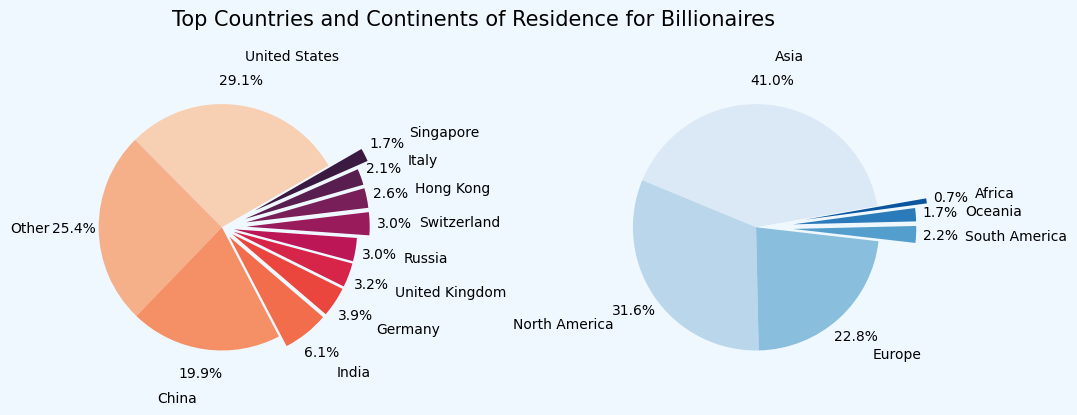

In [143]:
# Plotting pie charts for countries and continents 
fig = plt.figure(facecolor = 'aliceblue', figsize = (12, 4))
fig.suptitle("Top Countries and Continents of Residence for Billionaires", fontsize = 15, y = 1.04)
plt.subplots_adjust(wspace = 0.35, hspace = 0.1)

plt.subplot(1,2,1)
# plt.pie(x = country.Count[0:10], labels = country.Country[0:10], colors = sns.color_palette("rocket_r", 10), 
#         startangle = 55, autopct = '%1.2f%%', explode = [0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1], pctdistance = 1.2, 
#         labeldistance = 1.4, textprops = {'fontsize':10})
plt.pie(x = country.Count, labels = country.Country, colors = sns.color_palette("rocket_r", 12), autopct = '%1.1f%%',startangle = 30, 
        explode = [0, 0, 0, 0.1, 0.1,0.1,0.1, 0.2, 0.2, 0.2, 0.3], pctdistance = 1.2, labeldistance = 1.4)

plt.subplot(1,2,2)
plt.pie(x = continents.Count, labels = continents.Continent, colors = sns.color_palette("Blues"),
       autopct = '%1.1f%%', explode = [0,0,0,0.3,0.3,0.4], pctdistance = 1.2, labeldistance = 1.4, startangle = 10)
plt.show()

It seems that the United States is the most popular country of residence for billionaires, followed by China with approximately 29% and 20% respectively. The North American region accounts for nearly 32% of billionaires, right behind Asia with 41%. Europe comes in third with approximately 23%. The remaining continents only account for less than 5% of billionaires. 

In [144]:
# Initial sum count for wealth 
total_wealth = billions.groupby('country_of_residence').wealth.sum().sort_values(ascending = False).rename_axis('Country').reset_index(name = 'Total Wealth')
continent_wealth = billions.groupby('continent').wealth.sum().sort_values(ascending = False).rename_axis('Continent').reset_index(name = 'Total Wealth')

In [145]:
# Removing 'Others' from Dataframe
total_wealth = total_wealth.drop(1)
total_wealth

,Country,Total Wealth
0,United States,4575.1
2,China,1790.0
3,India,628.7
4,Germany,462.1
5,Switzerland,409.9
6,United Kingdom,370.7
7,Russia,351.0
8,Hong Kong,315.4
9,Italy,156.9
10,Singapore,135.9


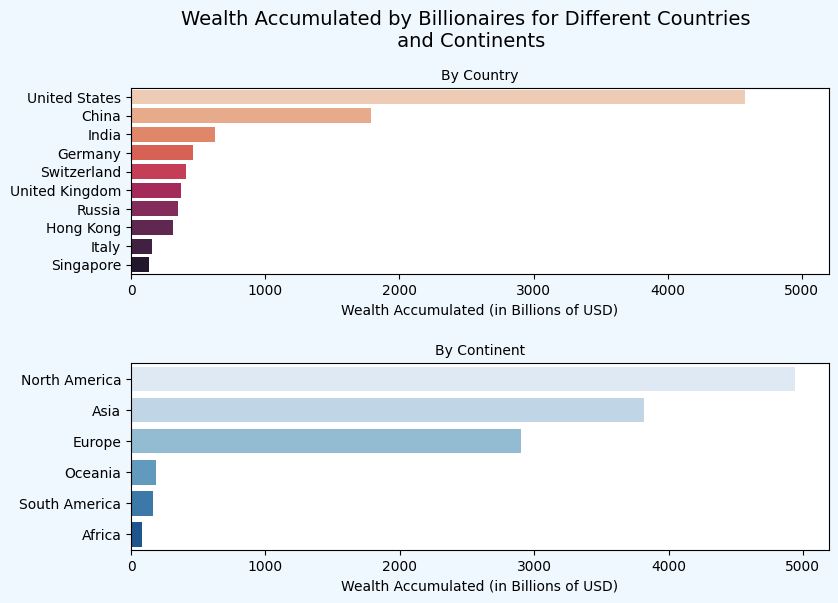

In [146]:
# Plotting bar charts for 
fig = plt.figure(facecolor = 'aliceblue', figsize = (9, 6))
fig.suptitle("Wealth Accumulated by Billionaires for Different Countries \n and Continents", fontsize = 14, y = 1.01)
plt.subplots_adjust(wspace = 0, hspace = 0.48)

plt.subplot(2,1,1)
sns.barplot(data = total_wealth, y = 'Country', x = 'Total Wealth', palette = sns.color_palette("rocket_r", 10))
plt.title('By Country', fontsize = 10)
plt.xlabel('Wealth Accumulated (in Billions of USD)')
plt.ylabel('')
plt.xlim((0,5200))

plt.subplot(2,1,2)
sns.barplot(data = continent_wealth, x = 'Total Wealth', y = 'Continent', palette = sns.color_palette("Blues"))
plt.title("By Continent", fontsize = 10)
plt.ylabel('')
plt.xlabel('Wealth Accumulated (in Billions of USD)')

plt.show()

The United States has the highest wealth accumulated by billionaires by a large margin, with approximately 4600 billion dollars. This is unsurprising as majority of billionaries reside in the U.S. China and India have the second and third highest wealth accumulated respectively. Even though most billionaires are in Asia, the North America region has the highest wealth accumulated with nearly 5000 billion dollars. This could be due to the billionaires in the U.S. Asia and Europe come in second and third respectively.

## Data Question 2: Do economic indicators have an impact on the presence of billionaires?

In [159]:
# Tabulating tax rate and GDP for each country
tax_rate_country = []
country_gdp = []

for countries in total_wealth.Country:
    for i in range(0, len(billions)):
        if billions.country_of_residence[i] == countries:
            country_gdp.append(billions.gdp_country[i])
            tax_rate_country.append(billions.tax_rate[i])
            break

In [182]:
tax_rate = billions.groupby('country_of_residence').tax_rate.max().rename_axis('Country').sort_values(ascending = False).reset_index(name = 'Tax')
gdp = billions.groupby('country_of_residence').gdp_country.max().rename_axis('Country').sort_values(ascending = False).reset_index(name = 'GDP')
tax_rate = tax_rate.drop(0)
gdp = gdp.drop(2)

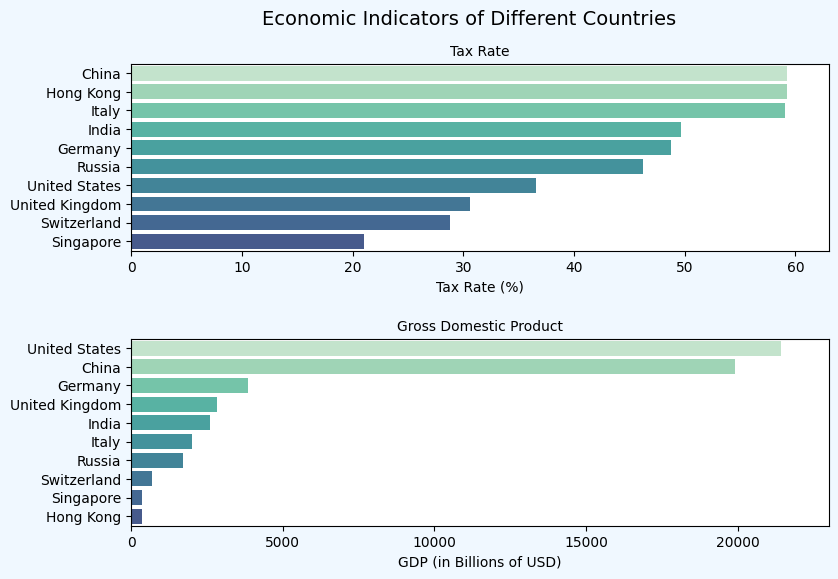

In [183]:
# Plotting bar charts for tax rate and GDP
fig = plt.figure(facecolor = 'aliceblue', figsize = (9,6))
fig.suptitle("Economic Indicators of Different Countries", fontsize = 14, y = 0.97)
plt.subplots_adjust(wspace = 0, hspace = 0.47)

plt.subplot(2,1,1)
ax = sns.barplot(x = tax_rate.Tax, y = tax_rate.Country, palette = sns.color_palette("mako_r",15))
# ax.bar_label(ax.containers[0])
plt.ylabel('')
plt.xlabel('Tax Rate (%)')
plt.title('Tax Rate', fontsize = 10)
plt.xlim(0, 63)
   
plt.subplot(2,1,2)
ax = sns.barplot(x = gdp.GDP, y = gdp.Country, palette = sns.color_palette("mako_r",15))
# ax.bar_label(ax.containers[0])
plt.ylabel('')
plt.xlabel('GDP (in Billions of USD)')
plt.title('Gross Domestic Product', fontsize = 10)
plt.xlim(0, 23000)
plt.show()

The bar charts above display the highest tax rates and GDP for different countries. By comparing these graphs with the countries billionaires live in, it can be seen that there is a positive correlation between a country's GDP and the number of billionaire residents. This will be shown in the following graph. Another observation found is that there is no correlation which can be seen between tax rates and number of billionaire residents.

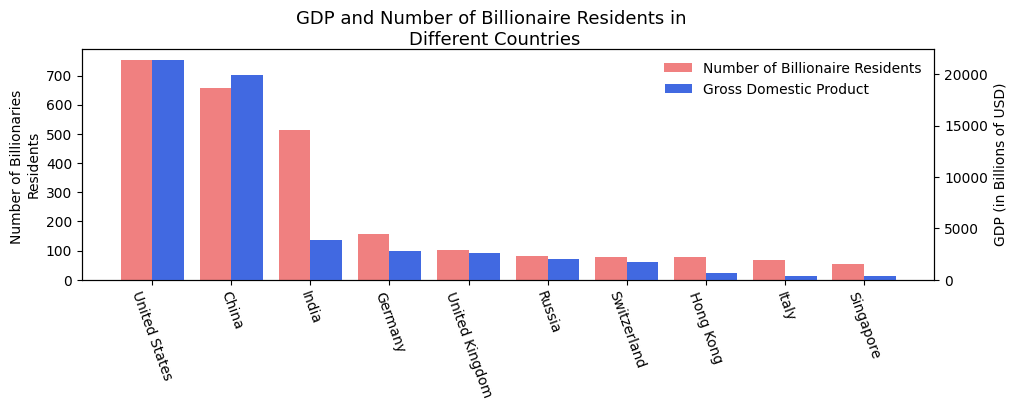

In [184]:
# Plotting bar charts for GDP and number of billionaire residents
ind = np.arange(10)
width = 0.4

fig, ax1 = plt.subplots(figsize = (11,3))
fig.suptitle("GDP and Number of Billionaire Residents in \nDifferent Countries", fontsize = 13, y = 1.01)

ax1.bar(ind, height = country.Count[0:10], width = width, color = 'lightcoral', label = 'Number of Billionaire Residents')
plt.xticks(ind + width / 2, ('United States', 'China', 'Germany', 'United Kingdom', 'India', 'Italy', 'Russia', 
                         'Switzerland', 'Hong Kong', 'Singapore'))
plt.ylabel('Number of Billionaries \nResidents')
ax1.tick_params(axis='x', rotation = -70)
plt.legend(frameon = False)

ax2 = ax1.twinx()
ax2.bar(ind + width, height = gdp.GDP, width = width, color = 'royalblue', label = 'Gross Domestic Product')
plt.xticks(ind + width / 2, ('United States', 'China', 'India', 'Germany', 'United Kingdom', 'Russia', 
                         'Switzerland', 'Hong Kong', 'Italy', 'Singapore'))
plt.ylabel('GDP (in Billions of USD)', x = 1.02)
plt.legend(frameon = False, loc = (0.677,0.77))
plt.show()

From the figure above, there is a trend that signifies the relationship between a country's GDP and the number of billionaire residents. As GDP decreases, the number of residents decreases as well. This relationship is not entirely linear as shown by certain countries such as Italy. Italy's GDP is much higher than Hong Kong and Switzerland, however its number of billionaire residents is lower.

## Data Question 3: Which industry contains the most billionaires?

In [151]:
# Initial count for industry
industry = billions.industry.value_counts().rename_axis('Industry').reset_index(name = 'Count')
industry.head()

,Industry,Count
0,Finance & Investments,364
1,Manufacturing,316
2,Technology,312
3,Fashion & Retail,261
4,Food & Beverage,207


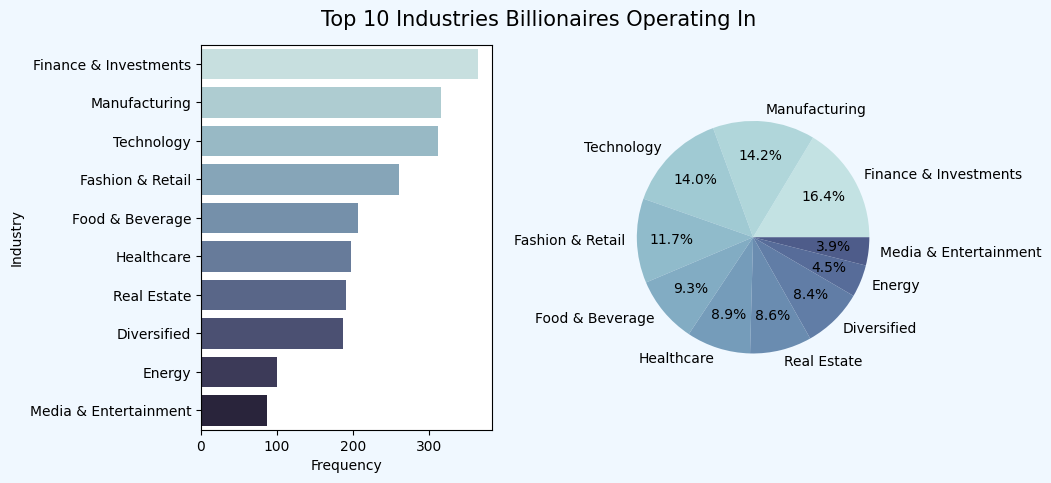

In [152]:
# Plotting graphs for industry count and distribution
fig = plt.figure(facecolor = 'aliceblue', figsize = (9, 5))
fig.suptitle("Top 10 Industries Billionaires Operating In", fontsize = 15, y = 0.95)
plt.subplots_adjust(wspace = 0.4, hspace = 0.1)

plt.subplot(1,2,1)
sns.barplot(data = industry[0:10], x = 'Count', y = 'Industry', palette= sns.color_palette("ch:start=.2, rot=-.3", 10))
plt.xlabel('Frequency')

plt.subplot(1,2,2)
plt.pie(x = industry.Count[0:10], labels = industry.Industry[0:10], colors = sns.color_palette("ch:start=.2, rot=-.3", 14), 
        startangle = 0, autopct = '%1.1f%%',pctdistance = 0.7, textprops = {'fontsize':10})
plt.title(" ", y= 1.03, fontsize = 14)
plt.show()

About 16% of billionaires operate in the Finance & Investments industry which makes it the most popular industry for billionaires. The manufacturing and technology industry follows with about 14% of billionaires each. 

In [153]:
# Initial wealth sum for different industries
industry_wealth = billions.groupby('industry').wealth.sum().rename_axis('Industry').sort_values(ascending = False).reset_index(name = 'Wealth')
industry_wealth.head()

,Industry,Wealth
0,Technology,1870.7
1,Fashion & Retail,1675.2
2,Finance & Investments,1593.6
3,Manufacturing,1006.4
4,Food & Beverage,946.0


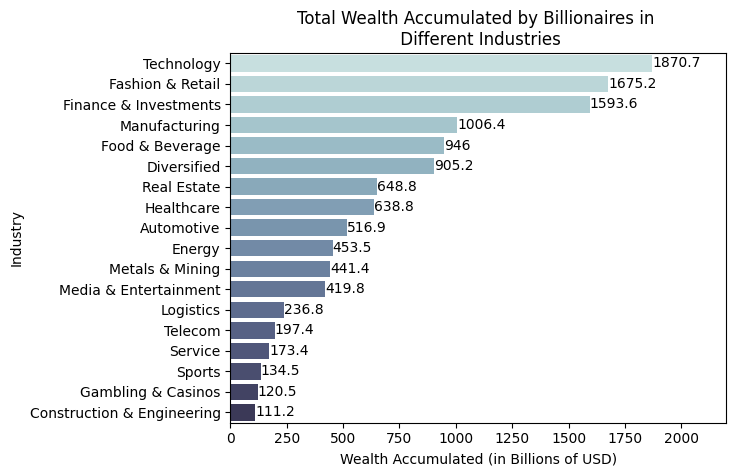

In [154]:
# Plotting industry against wealth accumulated
ax = sns.barplot(data = industry_wealth, x = 'Wealth', y = 'Industry', palette = sns.color_palette("ch:start=.2, rot=-.3", 20))
ax.bar_label(ax.containers[0])
plt.title('Total Wealth Accumulated by Billionaires in \n Different Industries')
plt.xlabel('Wealth Accumulated (in Billions of USD)')
plt.xlim(0, 2200)
plt.show()

Even though the technology industry is the third most popular industry, it has the highest wealth accumulated with an approximate of 1.87 trillion dollars. The Fashion & Retail industry is a close second with total of 1.68 trillion dollars accumulated. The Sports, Gambling and Construction industry has accumulated the least wealth by billionaires with 135 billion, 121 billion, 111 billion dollars respectively. 

## Data Question 4: Do male or female billionaires earn more?

In [155]:
# Initial count for gender 
gender = billions.gender.value_counts().rename_axis('Gender').reset_index(name = 'Count')
gender

,Gender,Count
0,M,2268
1,F,323


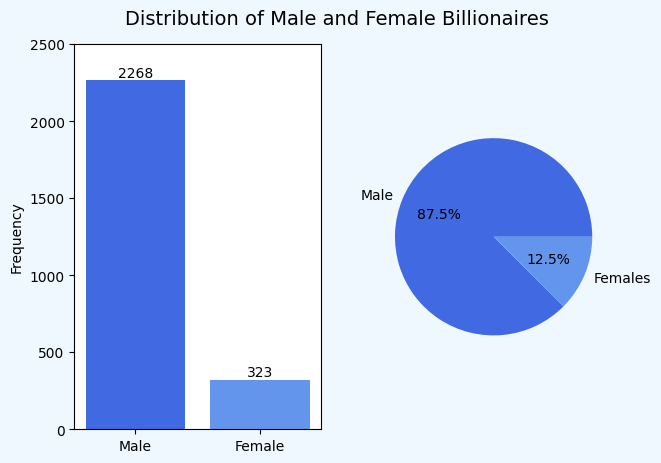

In [156]:
# Plotting graphs for distribution of male and female billionaires
fig = plt.figure(facecolor = 'aliceblue', figsize = (7, 5))
fig.suptitle("Distribution of Male and Female Billionaires", fontsize = 14, y = 0.95)
plt.subplots_adjust(wspace = 0.2, hspace = 0.1)


plt.subplot(1,2,1)
plt.bar(x = gender.Gender, height = gender.Count, color =['royalblue', 'cornflowerblue'])
addlabels(gender.Gender,gender.Count)
plt.xticks((0,1),('Male', 'Female'))
plt.ylabel('Frequency')
plt.ylim(0, 2500)

plt.subplot(1,2,2)
plt.pie(x = gender.Count, labels = ['Male', 'Females'], colors = ['royalblue', 'cornflowerblue'], autopct = '%1.1f%%',
       textprops = {'fontsize' : 10})
plt.show()

The number of male billionaires outweight the number of female billionaires. Male billionaires account for about 88% and only 12% are females. 

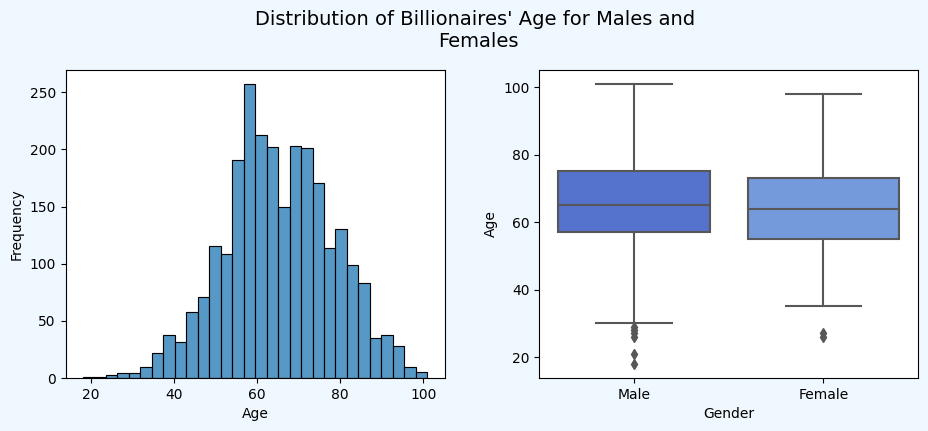

In [157]:
# Plotting graphs distribution of billionaires' age
fig = plt.figure(facecolor = 'aliceblue', figsize = (11, 4))
fig.suptitle("Distribution of Billionaires' Age for Males and \nFemales", fontsize = 14, y = 1.03)
plt.subplots_adjust(wspace = 0.25, hspace = 0.1)

plt.subplot(1,2,1)
sns.histplot(data = billions, x = 'age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(data = billions, x = 'gender', y = 'age', palette = ['royalblue','cornflowerblue'])
plt.xlabel('Gender')
plt.xticks((0,1),('Male', 'Female'))
plt.ylabel('Age')
plt.show()

The distribution of billionaire age is fairly widespread with a range between 20 and 100 years old. There is a larger percent of billionaires in within the age of 58 to 60 years old. The average age of male and female billionaires about the same, around 64 years old. However, the minimum age of male billionaires is higher than females, approximately 31 and 38 years old. There are many outliers for male billionaires below the minimum age. The youngest male billionaire is 18 years old whereas the youngest female billionaire is 26 years old. The oldest male and female billionaire is approximately 100 and 98 years old respectively.

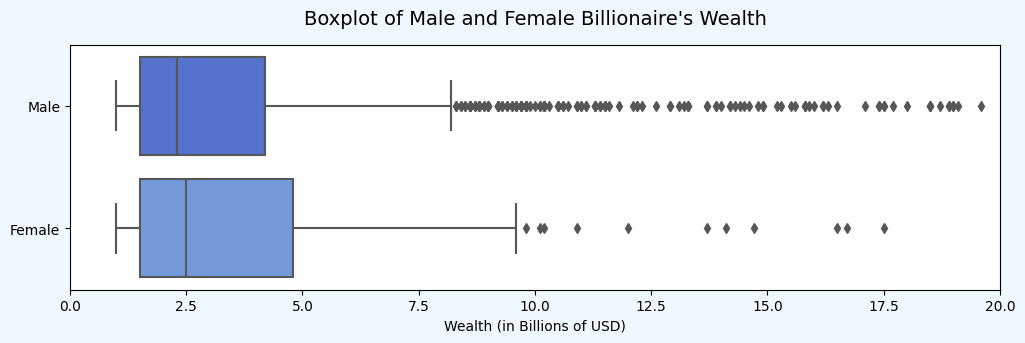

In [158]:
# Plotting boxplot for wealth of male and female billionaires
fig = plt.figure(facecolor = 'aliceblue', figsize = (12, 7))
plt.subplot(2,1,1)
sns.boxplot(data = billions, x = 'wealth', y = 'gender', palette= ['royalblue','cornflowerblue'])
plt.title("Boxplot of Male and Female Billionaire's Wealth", fontsize = 14, y = 1.05)
plt.xlabel('Wealth (in Billions of USD)')
plt.ylabel('')
plt.yticks((0,1), ('Male', 'Female'))
plt.xlim(0,20)
plt.show()

The boxplot above shows the wealth of male and female billionaires. The average wealth of female billionaires is higher than male billionaires by a small margin. The maximum wealth for female billionaires is also higher than male billionaires with approximately 9.5 billion and 8 billion dollars respectively. However, there is a signficant amount of male outliers with wealths much greater than the maximum. The wealthiest male billionaire has nearly 20 billion dollars whereas the wealthiest female female has 17.5 billion dollars. 

## Conclusion

This project explores a dataset containing information on billionaires. The objective is to gain an insight and identify any patterns or trends that could lead to the success of these billionaires. We found that majority of the richest billionaires reside in the United States and China. However, there is also a fair amount of billionaires who live in the Asia region. It was also found that a country's GDP could influence the place of residence of billionaires. A country of high GDP consists of more billionaires. The most common industry where a billionaire operates is in the Finance & Investment industry, followed by the manufacturing and technology industry. However, the technology industry is the wealthiest among these 3. Lastly, the number of male billionaires is significantly higher than female billionaires. Female billionaires earn more on average but there are numerous male billionaires who earn substantially more. 